In [3]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
from d2l_common import DataModule,Module
import torch.nn.functional as F


In [6]:
class Data(DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = self.X@w + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [7]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [28]:
class WeightDecayScratch(Module):
    def __init__(self, num_inputs, lambd, lr=0.01, sigma=0.01):
        super().__init__()
        self.num_inputs = num_inputs
        self.lambd = lambd
        self.lr = lr
        self.sigma = sigma
        self.net1 = nn.Linear(num_inputs, 10)
        self.net2 = nn.Linear(10, 1)
        self.w = self.net1.weight

    def forward(self, X):
        X = F.relu(self.net1(X))
        X = F.relu(self.net2(X))
        return X

    def loss(self, y_hat, y):
        return F.mse_loss(y_hat, y) + self.lambd*l2_penalty(self.w)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

In [29]:
from d2l_common import Trainer
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = Trainer(max_epochs=10)


def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    trainer.fit(model, data)
    print(f'L2 norm of w:{float(l2_penalty(model.w))}')
    model.plot()

L2 norm of w:1.6509604454040527


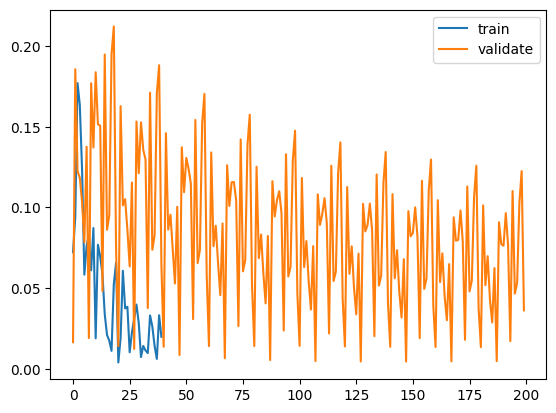

In [30]:
train_scratch(0)

L2 norm of w:0.1411336362361908


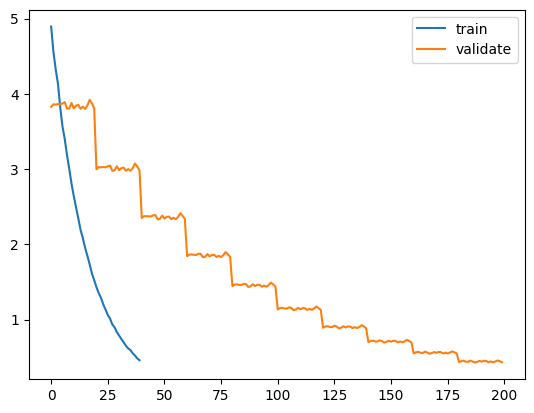

In [31]:
train_scratch(3)